**Project title :- PRCP-1018-BikeRental**

**Problem statement :-**

**Contents :-**
             
        1. Exploratory Data Analysis
           * Loading the dataset and libraries
           * Data cleaning
           * Typecasting the attributes
           * Missing value analysis
        2. Attributes distributions and trends
           * Monthly distribution of counts
           * Yearly distribution of counts
           * Outliers analysis
        3. Normality test
        4. Correlation matrix 
        5. Split the dataset into train and test dataset
        6. Encoding the categorical features
        7. Modelling the training dataset
           * Linear Regression Model
           * Decision Tree Regressor Model
           * Random Forest Model
        8. Cross Validation Prediction
           * Linear Regression CV Prediction
           * Decision Tree Regressor CV Prediction
           * Random Forest CV Prediction
        9. Model performance on test dataset
           * Linear Regression Prediction
           * Decision Tree Regressor Prediction
           * Random Forest Prediction
        10. Model Evaluation Metrics
           * R-squared score
           * Root mean square error
           * Mean absolute error
        11.Choosing best model for predicting bike rental count

**Exploratory Data Analysis**

**Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("D:\Bike rental project\Data"))



['bike sharing.docx', 'day.csv', 'hour.csv', 'Readme.txt']


**Read the training data**

In [2]:
#import the csv file
bike_df=pd.read_csv("D:\Bike rental project\Data\day.csv")

**Shape of the dataset**

In [3]:
#Shape of the dataset
bike_df.shape

(731, 16)

The dataset contains 731 observations and 16 attributes.

**Data types**

In [4]:
#Data types
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
#Read the data
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Rename the columns for better understanding of variables**

In [6]:
#Rename the columns
bike_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [7]:
#Read the data
bike_df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Typecasting the datetime and numerical attributes**

In [8]:
#Type casting the datetime and numerical attributes to category

bike_df['datetime']=pd.to_datetime(bike_df.datetime)

bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')

In [9]:
#Summary of the dataset
bike_df.describe()

,rec_id,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Missing value analysis**

No missing values present in training dataset.

In [10]:
#Missing values in dataset
bike_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

**Attributes distributions and trends**

**Monthly distribution of counts**

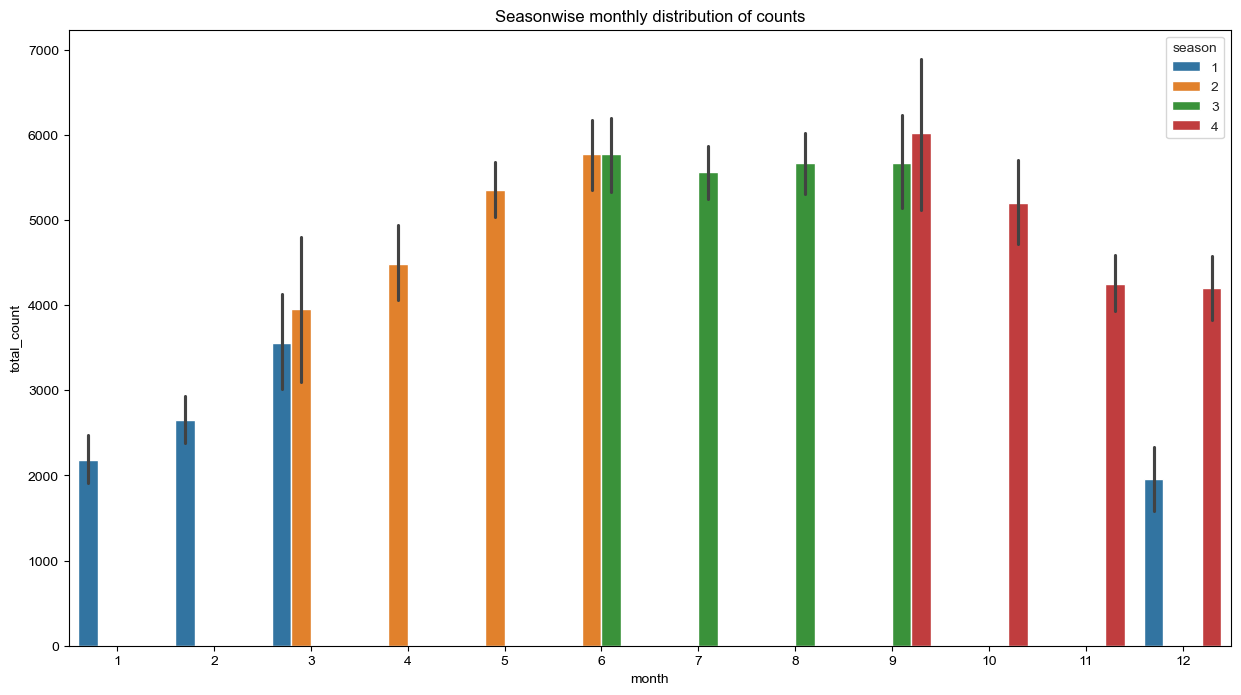

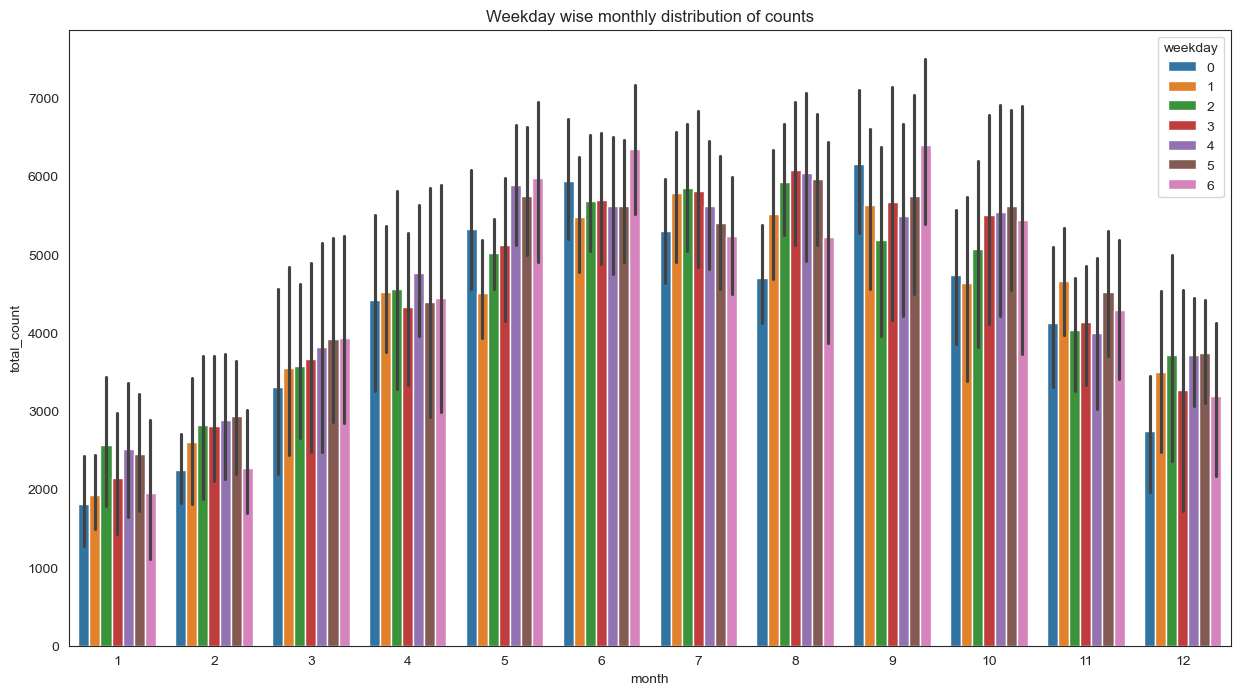

In [11]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

From the above plots, we can observed that increasing the bike rental count in springe and summer season and then decreasing the bike rental count in fall and winter season.
Here, 

season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

**Yearly wise distribution of counts**

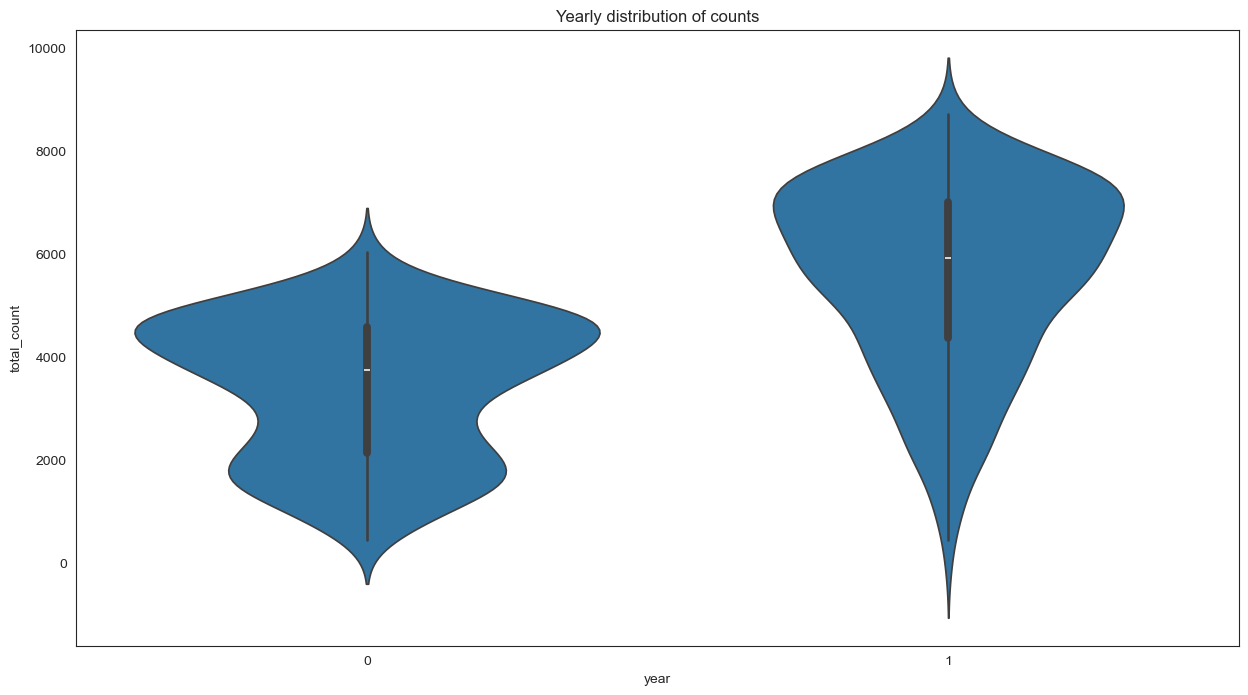

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='total_count',data=bike_df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011. 

Here,  
year 0-> 2011, year 1-> 2012

**Holiday wise distribution of counts**

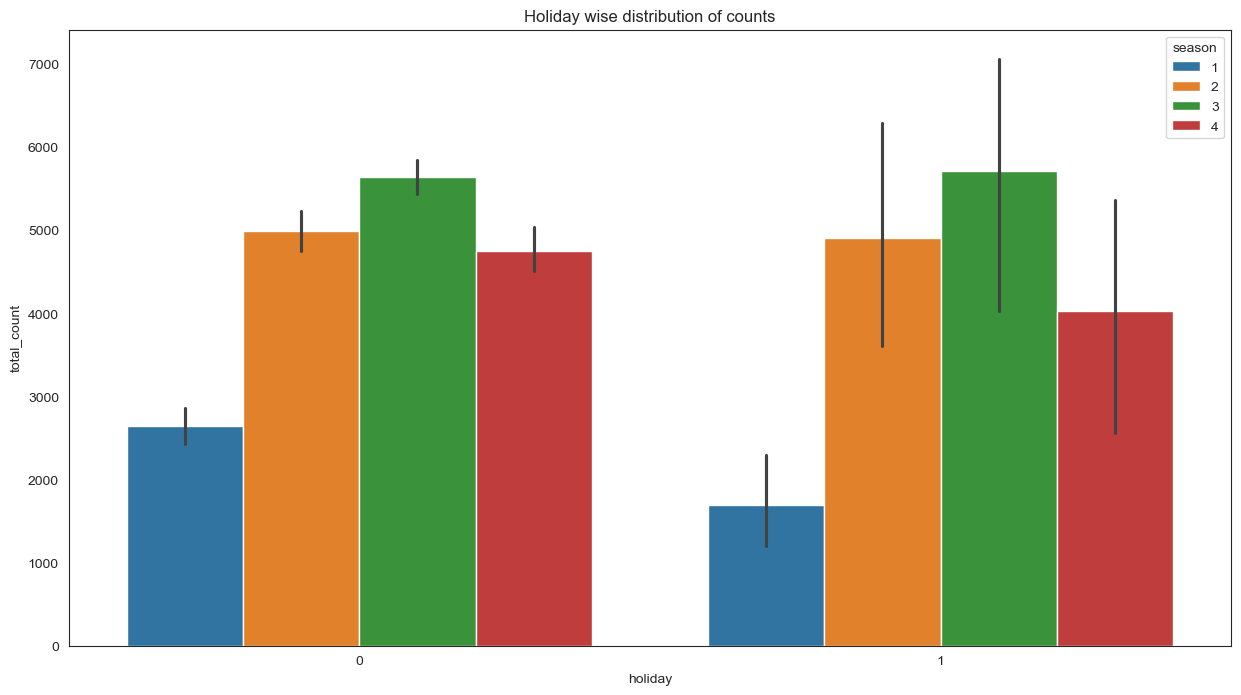

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=bike_df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

Here, 0->No holiday, 1-> holiday

**Workingday wise distribution of counts**

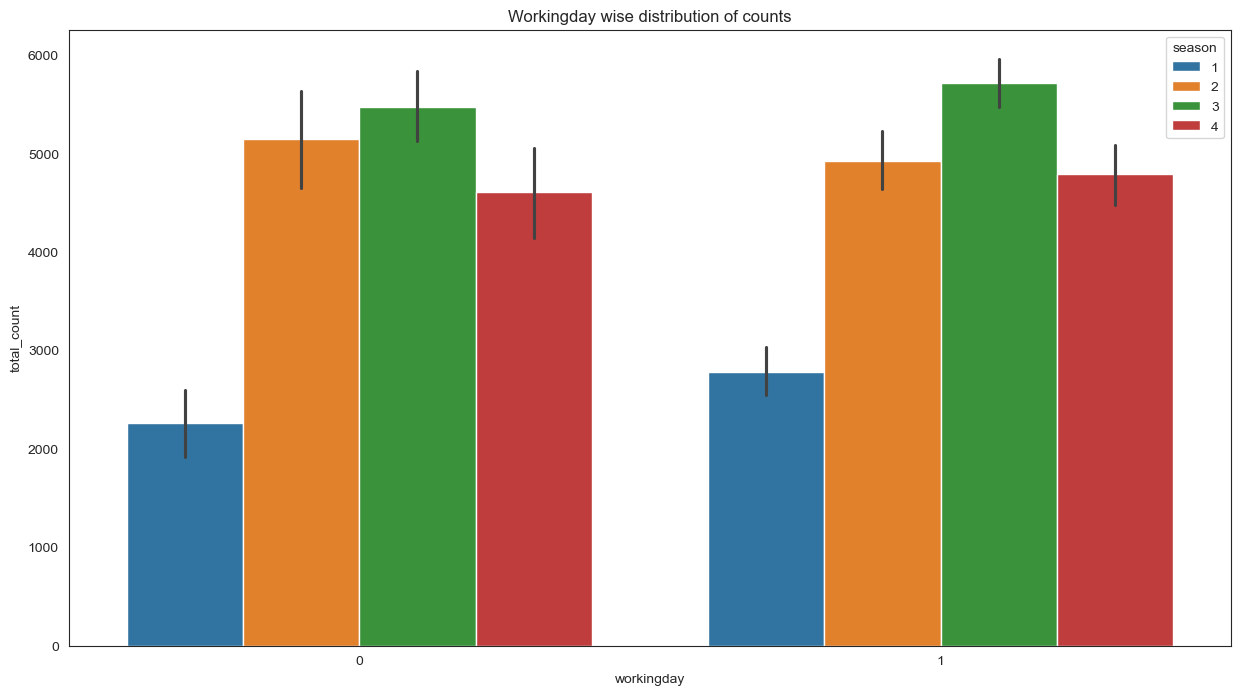

In [14]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=bike_df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

Here, 0-> No workingday, 1-> workingday

**Weather_condition distribution of counts**

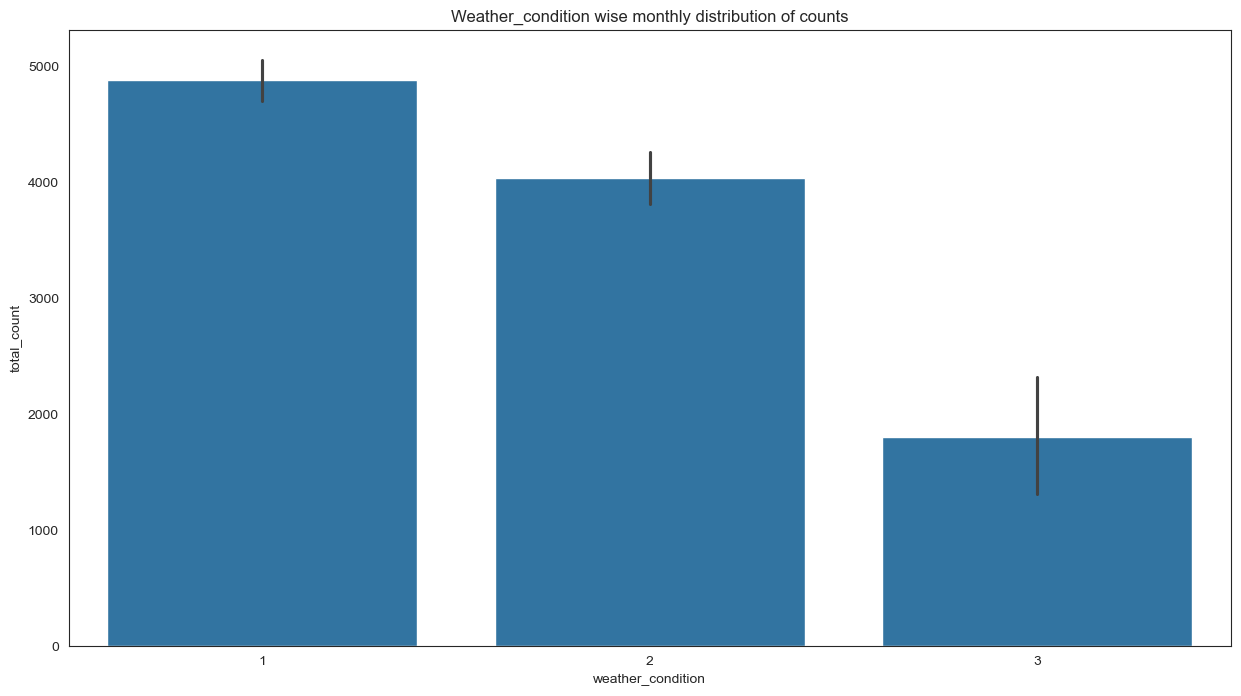

In [15]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=bike_df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

**Outlier analysis**

**Total_Count_Outliers**

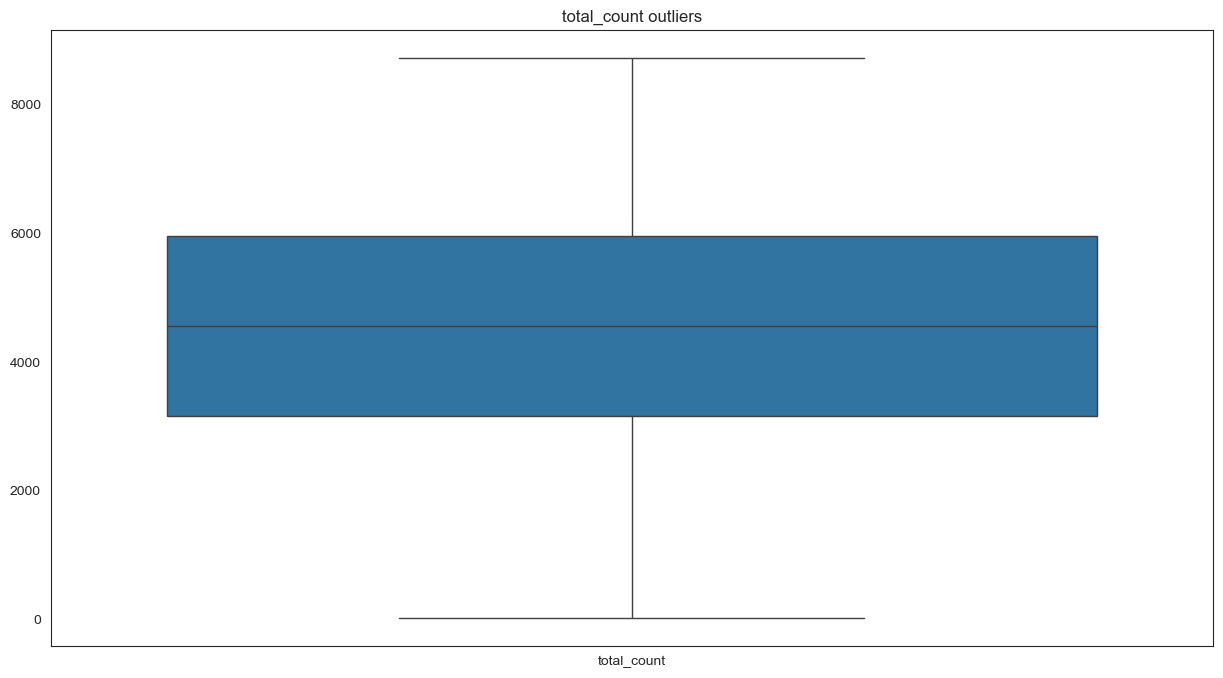

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bike_df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

From the box plot, we can observed that no outliers are present in total_count variable.

**Temp_windspeed_humidity_outliers**

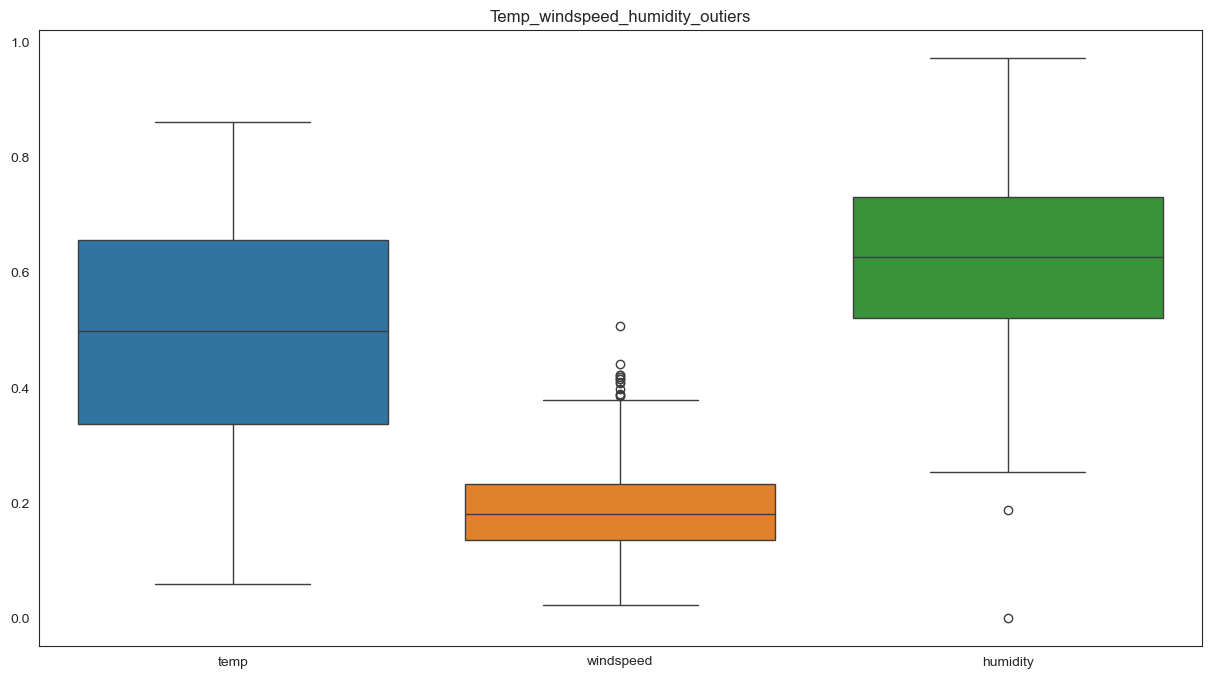

In [17]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

**Replace and impute the outliers**

In [21]:
from fancyimpute import KNN

#create dataframe for outliers
wind_hum=pd.DataFrame(bike_df,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())

**Replace the original dataset to imputated data**

In [22]:
#Replacing the imputated windspeed
bike_df['windspeed']=bike_df['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
bike_df['humidity']=bike_df['humidity'].replace(wind_hum['humidity'])
bike_df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Normal Probability Plot**

Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

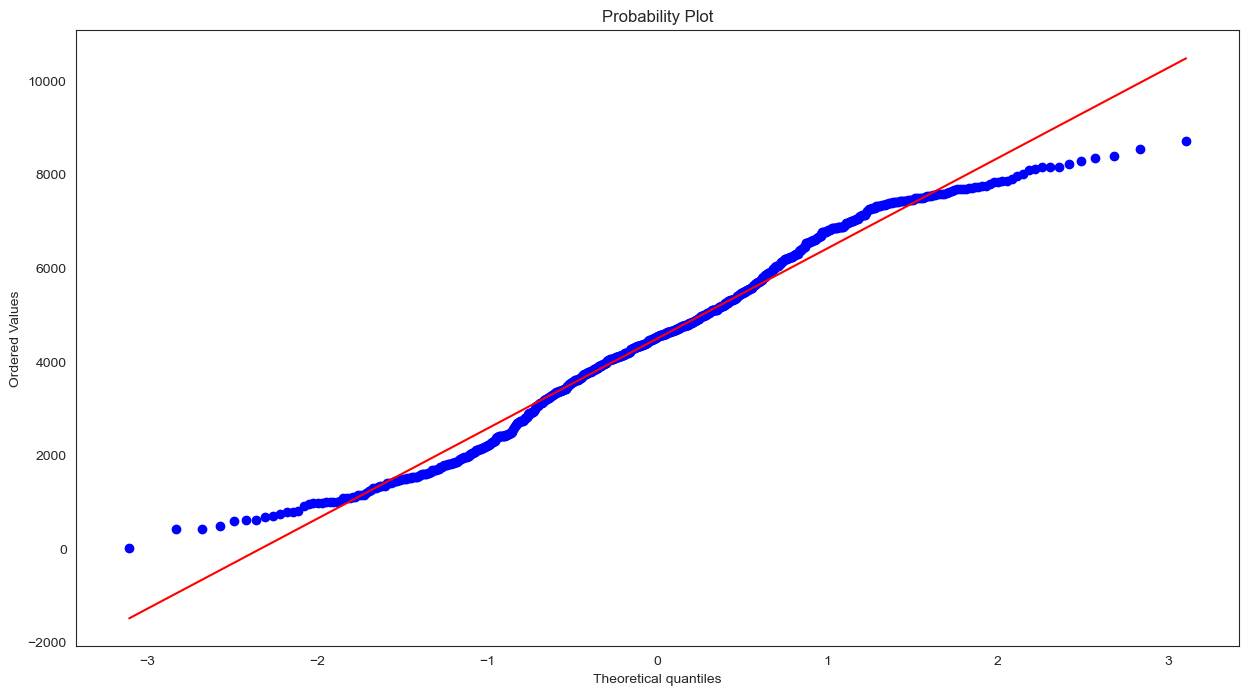

In [23]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike_df.total_count.tolist(),dist='norm',plot=plt)
plt.show()

The above probability plot, the some target variable data points are deviates from normality.

**Correlation matrix**

Correlation matrix is tells about linear relationship between attributes and help us to build better models.

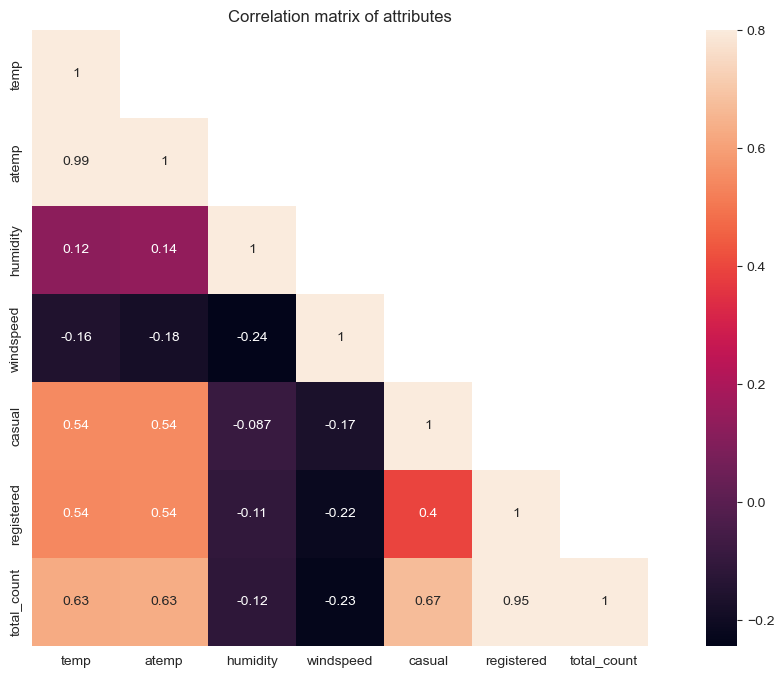

In [24]:
#Create the correlation matrix
correMtr=bike_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

**Modelling the dataset**

In [25]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

Split the dataset into train and test in the ratio of 70:30

In [26]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bike_df.iloc[:,0:-3],bike_df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 14) (220, 14) (511, 2) (220, 2)
   index  total_count
0    223         4905
1    684         5445
2    685         5698
3    163         5020
4    394         3624
   index  total_count
0    703         6606
1     33         1550
2    300         3747
3    456         6041
4    633         7538


**Split the features into categorical and numerical features**

In [27]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

**Decoding the training attributes**

In [28]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,8,5,0.415000,0.708333,0.125621,False,False,True,False,True,False,False,True,True,False,False,True,False
1,11,4,0.620417,0.321667,0.152987,False,False,False,True,True,False,False,True,False,True,False,False,True
2,11,5,0.524583,0.345000,0.171025,False,False,False,True,True,False,False,True,True,False,False,False,True
3,6,1,0.494583,0.635000,0.305350,False,True,False,False,True,False,False,True,True,False,False,True,False
4,1,1,0.400833,0.269167,0.215792,True,False,False,False,True,False,False,True,True,False,False,False,True


**Training dataset**

In [29]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

**Linear Regression Model**

In [30]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

**fit the training model**

In [31]:
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

**Accuracy of model**

In [32]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8165025087335218
Model coefficients : [  -25.40093273    69.00041734 -1021.83801516  5265.83269167
 -2556.15204574  -949.34444399   229.82675107   -79.72789531
   799.24558823   228.48467064  -228.48467064   -78.95445063
    78.95445063   761.85445399   252.23446226 -1014.08891625
  -989.30080604   989.30080604]
Model intercept value : 2195.3105623488495


**Cross validation prediction**

In [33]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 5248.7578435 ,  5038.5615668 ,  5806.79339316,  4353.94868702,
        3738.02165465,  6781.13199665,  6258.53686563,  3802.32154757,
        4679.69060739,  3413.26938345,  5382.26926795,  3103.26413427,
        4340.14502978,  5792.02135524,  4357.90482085,  6307.47067538,
        4382.53420011,  3356.51602988,   722.55880035,   542.99629923,
        7419.07107033,  3747.2639444 ,  5282.38323084,  5494.01243603,
        6941.05375802,  7322.95928003,  3629.5886932 ,  3571.12912785,
         985.45343201,  4884.05952005,  1644.73801661,  1708.88196943,
        1689.90104258,  1295.63879625,  4891.47726849,  5507.81236621,
        6015.17425095,  4180.63057735,  5075.38404498,  5941.56769703,
        6400.40498745,  4215.81855312,  5962.38814912,  6052.71452714,
        3345.73314148,  4096.72004817,  1465.44713372,  3603.17274178,
        4587.89942466,  6650.65699064,  1719.93360965,  6128.15135134,
        6439.33525805,  3277.84008997,  4592.0786174 ,  3194.61235   ,
      

**Cross validation prediction plot**

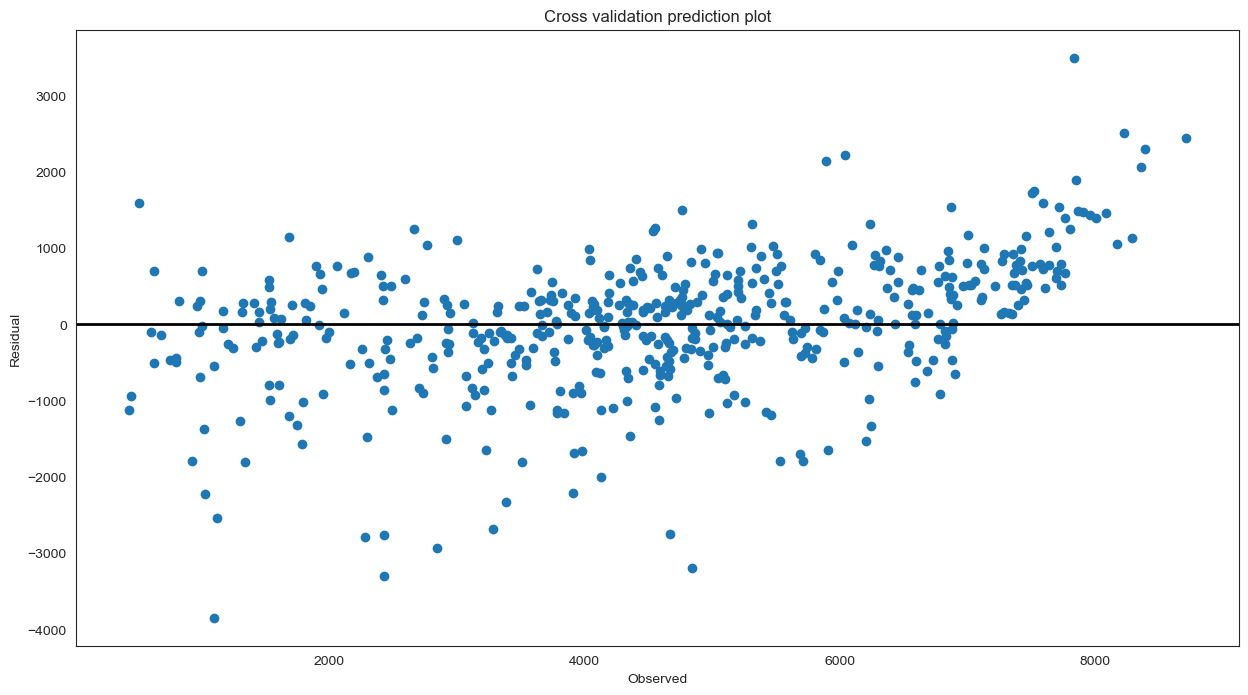

In [34]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.

**Model evalution metrics**

**R-squared and mean squared error score**

In [35]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7995611885231044


The R-squared or coefficient of determination is 0.80 on average for 3-fold cross validation , it means that predictor is only able to predict 80% of the variance in the target variable which is contributed by independent variables.

**Decoding the test attributes**

In [36]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (220, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,False,False,False,True,True,False,False,True,True,False,False,False,True
1,2,4,0.437826,0.186957,0.277752,True,False,False,False,True,False,False,True,True,False,False,True,False
2,10,5,0.585833,0.330833,0.229479,False,False,False,True,True,False,False,True,False,True,False,True,False
3,4,0,0.676250,0.425833,0.172267,False,True,False,False,True,False,True,False,False,True,False,False,True
4,9,2,0.570000,0.550000,0.236321,False,False,False,True,True,False,False,True,True,False,False,False,True


**Model performance on test dataset**

In [37]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

**Predict the model**

In [38]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([6197.12329782, 1378.27938018, 3212.82326914, 4825.6058012 ,
       6672.2308762 , 6942.2039349 ,  693.99373527, 1929.80808599,
       6981.48110092, 6844.67173725, 2798.54559266, 2121.8457389 ,
       4465.68268321, 5486.74428544, 2189.59008463, 1827.67433934,
       2173.48158771, 7469.58027211, 5500.15015098, 2608.49336522,
       6933.20124884, 7837.10306473, 5532.48547104, 1261.13929139,
       1245.46616862, 4479.83361908, 2496.61989036, 6733.37234742,
       3854.86011528, 5802.97615092, 3103.90712661, 4252.34563973,
       6358.26561572, 6798.3144729 , 5790.26253638, 5402.54802544,
       6692.75313381, 5848.44121572, 3180.98457936,  805.80292438,
       4497.72178336, 3746.59014984, 6903.03554988, 4077.94155535,
       6907.0442079 , 1687.7942605 , 4801.49297945, 4723.9530173 ,
       6369.39948476, 4579.39869385, 3105.76669461, 2833.81705416,
       1829.36260472, 5601.65932265, 4625.78263028, 4089.39223053,
       4695.03945324, 3038.41700558, 4351.67190815, 6630.97204

**Model evaluation metrics**

**Root mean square error and mean absolute error scores**

In [39]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 783.0616972625062
Mean absolute error : 594.7368430236427


**Residual plot**

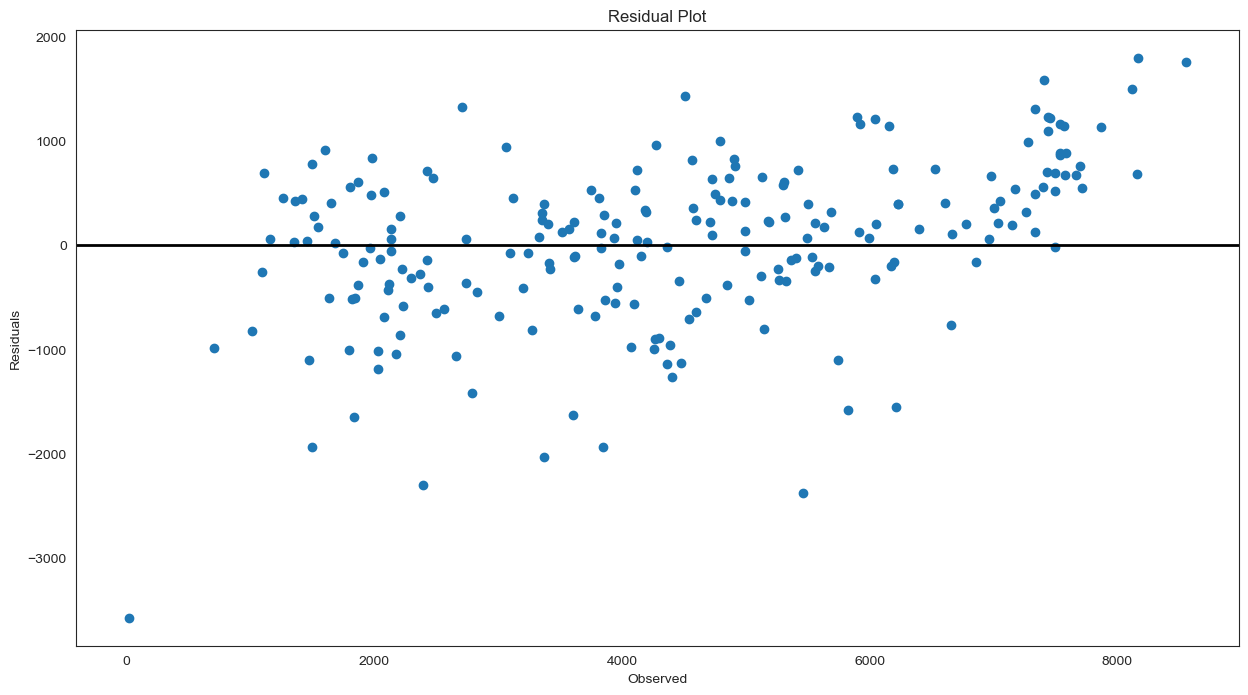

In [40]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

Residual plot tells about finite variance between actual target value and predicted target value.In this plot,very less data points are have same finite variance between them and for most are not have it.

**Decision tree regressor**

In [41]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

**Fit the model**

In [42]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

**Decision tree regression accuracy score**

In [43]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8082151777539757


**Plot the learned model**

In [51]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Cross validation prediction

In [ ]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

**Cross validation prediction plot**

In [ ]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot,some data points are have same finite variance between them and for some are not have it.

**Model evalution metrics**

**R-squared and mean squared error scores**

In [ ]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

The R-squared or coefficient of determination is 0.74 on average for 3-fold cross validation ,it means that predictor is only able to predict 74% of the variance in the target variable which is contributed by independent variables.

**Model performance on test dataset**

In [ ]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

**Root mean squared error and mean absolute error**

In [ ]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

**Residual plot**

In [ ]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

Residual plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.

**Random Forest**

In [ ]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

**Fit the model**

In [ ]:
#Fit the trained model
rf.fit(X_train,y_train)

**Random forest accuracy score**

In [ ]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

**Cross validation prediction**

In [ ]:
#Cross validation prediction
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

**Cross validation prediction plot**

In [ ]:
#Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot,some data points are have same finite variance between them and for some are not have it.

**R-squared and mean squared error scores**

In [ ]:
#R-squared scores
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))


The R-squared or coefficient of determination is 0.85 on average for 3-fold cross validation , it means that predictor is only able to predict 85% of the variance in the target variable which is contributed by independent variables.

**Model performance on test dataset**

In [ ]:
#predict the model
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

**Root mean squared error and mean absolute error**

In [ ]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

**Residual plot**

In [ ]:
#Residual scatter plot
fig, ax = plt.subplots(figsize=(15,8))
residuals=y_test-rf_pred
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value.In this plot,some data points are have same finite variance between them and for some are not have it.

**Final model for predicting the bike rental count on daily basis**

When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. So, finally random forest model is bset for predicting the bike rental count on daily basis.

In [ ]:
Bike_df1=pd.DataFrame(y_test,columns=['y_test'])
Bike_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
Bike_predictions.to_csv('Bike_Renting_Python.csv')
Bike_predictions

In [20]:
pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB 1.9 MB/s eta 0:00:07
   ---------------------------------------- 0.1/12.8 MB 975.2 kB/s eta 0:00:14
   ---------------------------------------- 0.1/12.8 MB 980.4 kB/s eta 0:00:13
   ---------------------------------------- 0.2/12.8 MB 913.1 kB/s eta 0:00:14
    --------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.4/12.8 MB 1.0 MB/s eta 0:00:13
   - ----------------------

In [45]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
